In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
sns.set_style('darkgrid')

In [37]:
data = pd.read_csv("/private/var/mobile/Containers/Data/Application/9529F81F-C25F-4E83-BBFE-31306C8B82A4/Documents/framingham.csv")

In [38]:
data = data.dropna()
display(data)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


,Feature,f_statistic,p value
1,age,211.305943,1.389380e-46
10,sysBP,191.012029,2.188901e-42
7,prevalentHyp,124.551357,1.831673e-28
11,diaBP,84.499952,6.287375e-20
14,glucose,55.154616,1.379267e-13
8,diabetes,32.154613,1.534140e-08
0,male,31.017247,2.741866e-08
9,totChol,30.597209,3.398309e-08
5,BPMeds,29.250937,6.766351e-08
12,BMI,24.694039,7.027386e-07


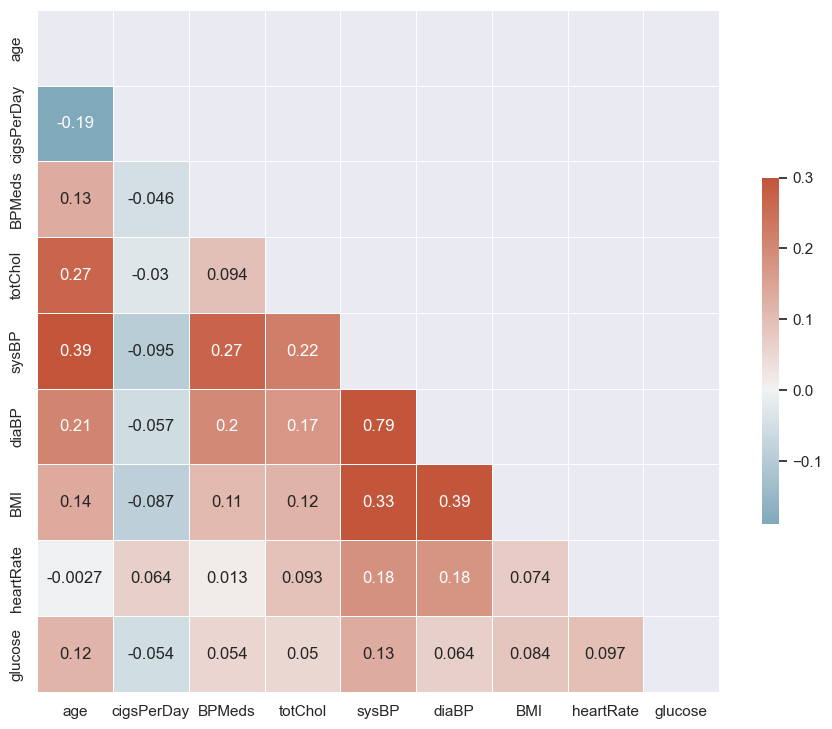

In [39]:
#continuous columns
lin_cols = ['age','cigsPerDay','BPMeds','totChol','sysBP','diaBP','BMI','heartRate','glucose']
corr = data[lin_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


X = data.drop('TenYearCHD', axis=1).values
y = data['TenYearCHD'].values

from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X,y)
f_test_df = pd.DataFrame({'Feature':data.drop('TenYearCHD', axis=1).columns,'f_statistic':f_stat, 'p value':
                         f_p_value})
display(f_test_df.sort_values('p value'))

In [40]:
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#determining whether means are similar in train and test group
display(np.mean(y_train), np.mean(y_test))
#test group is representative of training group

(2924, 15)

(732, 15)

(2924,)

(732,)

0.14740082079343364

0.1721311475409836

In [41]:
lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                       intercept_scaling=1, max_iter=100, multi_class='auto',n_jobs=None,
                       penalty='l2',random_state=None, solver='liblinear', tol=0.0001, verbose=0, 
                       warm_start=False)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#getting proportion of correct calculations
is_correct = y_pred == y_test
display(f'The model is correct in predicting the majority class {np.mean(is_correct)*100}% of the time.')

display(metrics.accuracy_score(y_test, y_pred))
display(pd.DataFrame(data=lr.coef_, columns=list(X.columns), index=['Coefficients']))


'The model is correct in predicting the majority class 83.33333333333334% of the time.'

0.8333333333333334

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
Coefficients,0.349593,0.033318,-0.144427,-0.173141,0.019948,0.282862,0.110315,0.801637,0.361934,0.000112,0.010811,-0.017264,-0.054007,-0.020791,0.00449


In [42]:
display(metrics.confusion_matrix(y_test, y_pred))
y_pred_proba = lr.predict_proba(X_test)
display(y_pred_proba)

#all positive probabilities with threshhold defaulted to 0.5
pos_proba = y_pred_proba[:,1]
display(pos_proba)

array([[604,   2],
       [120,   6]])

array([[0.76635365, 0.23364635],
       [0.79187742, 0.20812258],
       [0.75608622, 0.24391378],
       ...,
       [0.90066086, 0.09933914],
       [0.86600952, 0.13399048],
       [0.77026019, 0.22973981]])

array([0.23364635, 0.20812258, 0.24391378, 0.03579947, 0.04840123,
       0.05358925, 0.11041016, 0.11563939, 0.37483919, 0.05323871,
       0.07569733, 0.17848626, 0.18491383, 0.04910673, 0.32588778,
       0.04779001, 0.12305706, 0.21432206, 0.04434977, 0.19240608,
       0.12878723, 0.06112094, 0.11631357, 0.07864706, 0.04149962,
       0.15168891, 0.16146372, 0.07123136, 0.1234472 , 0.52787416,
       0.22598148, 0.07636459, 0.09824423, 0.07869837, 0.12655855,
       0.2567068 , 0.13312366, 0.03506309, 0.09493834, 0.06407926,
       0.38898696, 0.09881063, 0.20106345, 0.07114351, 0.06509108,
       0.04993726, 0.11730298, 0.0572014 , 0.1879686 , 0.25748755,
       0.07122615, 0.26611534, 0.06799873, 0.05948994, 0.18970386,
       0.263185  , 0.05638817, 0.05818323, 0.06511489, 0.10612979,
       0.09514322, 0.25257079, 0.12440304, 0.18713551, 0.04996039,
       0.28445773, 0.04982679, 0.07743173, 0.08697727, 0.1532078 ,
       0.09957064, 0.08787181, 0.44165605, 0.14390907, 0.21006

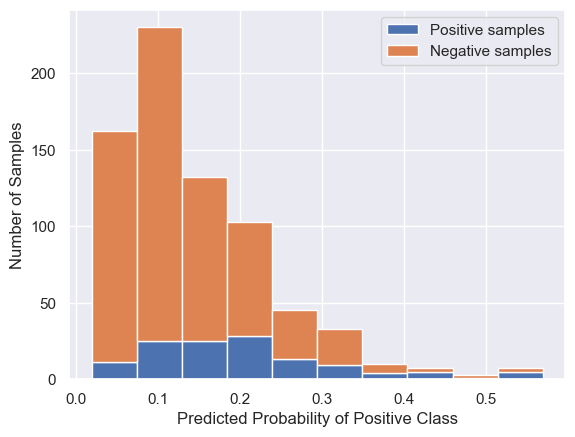

In [43]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples','Negative samples'])
plt.xlabel('Predicted Probability of Positive Class')
plt.ylabel('Number of Samples')
plt.show()

array([1.56978887, 0.56978887, 0.54326181, 0.54088654, 0.52787416,
       0.51684064, 0.51370351, 0.45990173, 0.44165605, 0.43464807,
       0.41643254, 0.38898696, 0.38753505, 0.37483919, 0.3655301 ,
       0.36225447, 0.35539375, 0.35034091, 0.3500742 , 0.33656189,
       0.33643135, 0.32851313, 0.32588778, 0.31638515, 0.31607782,
       0.31288605, 0.30852211, 0.30491738, 0.30437905, 0.30415463,
       0.30368933, 0.30217668, 0.3015888 , 0.29820175, 0.29691675,
       0.28598761, 0.28445773, 0.27347455, 0.27035161, 0.26898964,
       0.26755033, 0.26611534, 0.26409856, 0.26183544, 0.26051612,
       0.25257079, 0.25115021, 0.24854329, 0.24634154, 0.24415804,
       0.24215135, 0.24187213, 0.23782182, 0.23764608, 0.2359578 ,
       0.23277636, 0.23146943, 0.22927762, 0.22790583, 0.22748319,
       0.22643281, 0.22598148, 0.22528038, 0.21788262, 0.21726976,
       0.21486041, 0.21177613, 0.21062365, 0.21026891, 0.20966705,
       0.20938119, 0.20812258, 0.20605513, 0.20574772, 0.20511

'The AUC is: 0.6869401225836868'

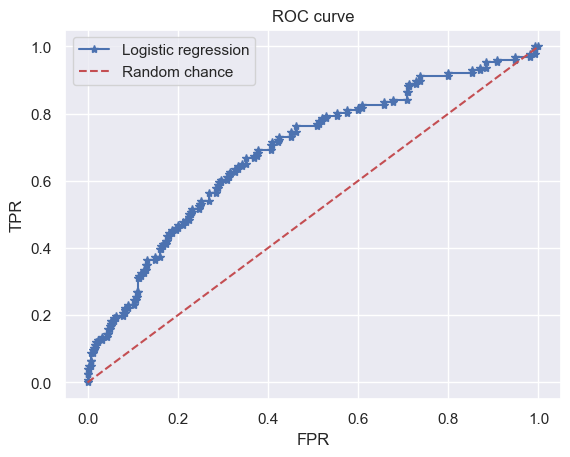

In [44]:
# ROC curve to grade threshold

fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr, '*-')
plt.plot([0,1],[0,1],'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

display(thresholds)
auc = metrics.roc_auc_score(y_test, pos_proba)
display(f'The AUC is: {auc}')